In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('Training_Data_Set.csv')

In [3]:
df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [5]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [6]:
df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [7]:
round( df['Distance '].isnull().sum()/len(df), 5)

0.02263

In [8]:
round( df['engine_power'].isnull().sum()/len(df), 5)

0.02689

In [9]:
round( df['body_type'].isnull().sum()/len(df), 5)

0.92271

In [10]:
df.dropna(subset = ['Distance '],inplace=True)

In [11]:
df['Distance '].isnull().sum()

0

In [12]:
df.dropna(subset = ['engine_power'],inplace=True)

In [13]:
df['engine_power'].isnull().sum()

0

In [14]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                   0
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power               0
body_type              48430
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [15]:
df1 = df.copy()

In [16]:
df1.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50
5,25006,skoda,octavia,Chennai,12015.0,First,2015,4,1968,110.0,NaN,4,man,4,5,diesel,1543728.75


In [17]:
label_encoder = preprocessing.LabelEncoder()

In [18]:
df1['Maker'] = label_encoder.fit_transform(df['Maker'])

In [19]:
df1['model'] = label_encoder.fit_transform(df['model'])

In [20]:
df1['Location'] = label_encoder.fit_transform(df['Location'])

In [21]:
df1['Owner Type'] = label_encoder.fit_transform(df['Owner Type'])

In [22]:
df1['transmission'] = label_encoder.fit_transform(df['transmission'])

In [23]:
df1['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])

In [24]:
df1.rename(columns = {'Distance ':'Distance','Owner Type':'Owner_Type','Age of car':'Age_of_car','Vroom Audit Rating':'Vroom_Audit_Rating'}, inplace = True)

In [25]:
df1.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance', 'Owner_Type',
       'manufacture_year', 'Age_of_car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom_Audit_Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

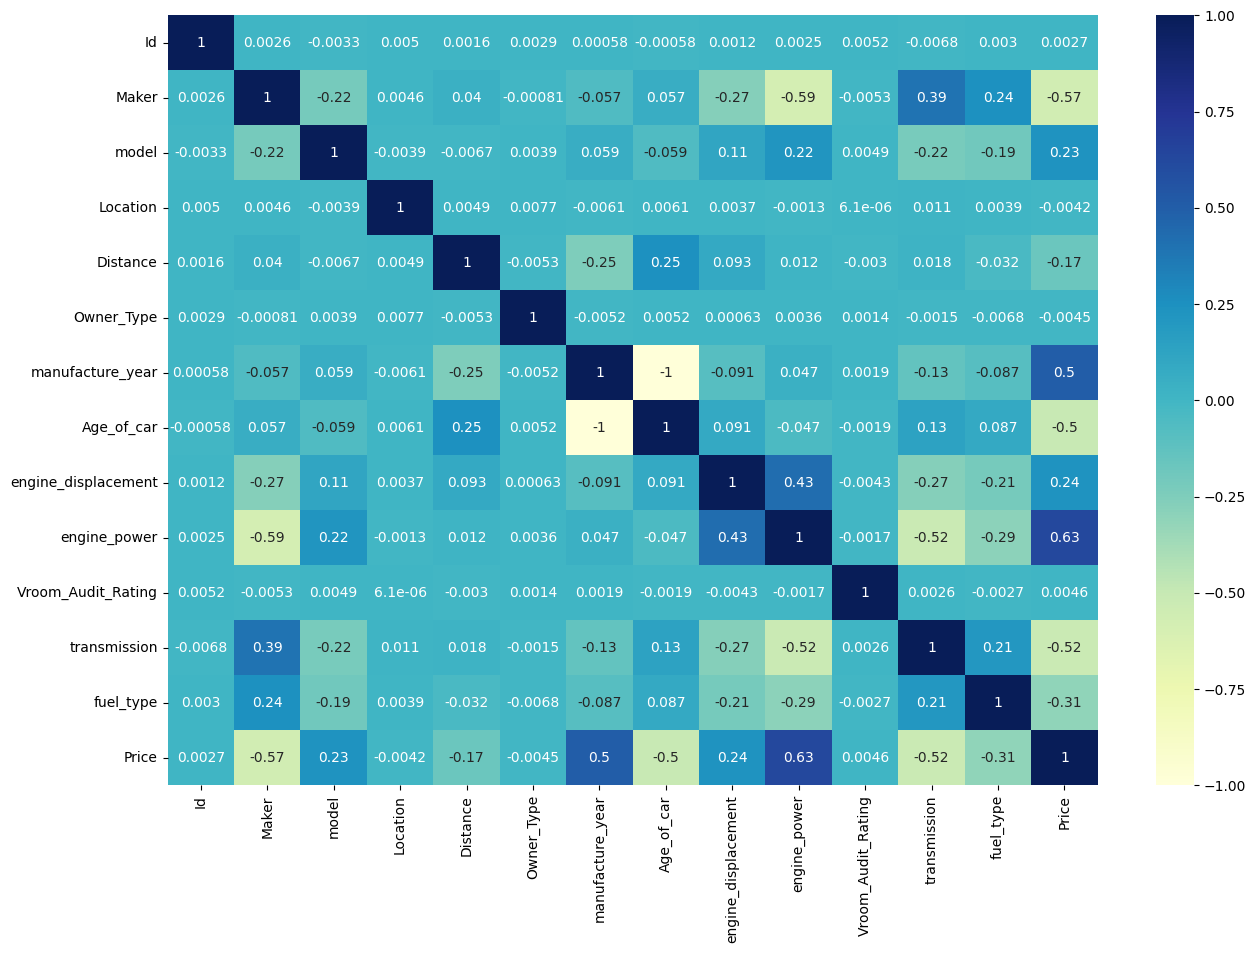

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot =True, cmap='YlGnBu')
plt.show

In [27]:
X = df1[['Id','Maker','model','Location','Distance','Owner_Type','manufacture_year','Age_of_car','engine_displacement','engine_power','Vroom_Audit_Rating','transmission','fuel_type']]
y = df[['Price']]

In [28]:
model = LinearRegression()

In [29]:
model.fit(X,y)

LinearRegression()

In [30]:
y_pre = pd.DataFrame(model.predict(X))

In [33]:
mse = mean_squared_error(y,y_pre)

In [34]:
np.sqrt(mse)

466947.6611567845

In [35]:
test = pd.read_csv('Test_Data_Set.csv')

In [36]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [37]:
test['Maker'] = label_encoder.fit_transform(test['Maker'])
test['model'] = label_encoder.fit_transform(test['model'])
test['Location'] = label_encoder.fit_transform(test['Location'])
test['Owner Type'] = label_encoder.fit_transform(test['Owner Type'])
test['transmission'] = label_encoder.fit_transform(test['transmission'])
test['fuel_type'] = label_encoder.fit_transform(test['fuel_type'])

In [38]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,6,8,9,150000.0,0,2007,12,1595,75.0,NaN,5,1,4,5,1
1,11002,6,14,3,29376.0,3,2014,5,1598,77.0,NaN,4,1,4,5,0
2,11003,6,8,3,30563.0,2,2014,5,1968,110.0,NaN,5,1,5,5,0
3,11004,0,10,4,8650.0,1,2015,4,1968,110.0,NaN,8,0,4,5,0
4,11005,0,17,2,6400.0,3,2015,4,1984,169.0,NaN,4,0,2,None,1


In [39]:
test.rename(columns = {'Distance ':'Distance','Owner Type':'Owner_Type',
                       'Age of car':'Age_of_car','Vroom Audit Rating':'Vroom_Audit_Rating'}, inplace = True)

In [40]:
X_test = test[['Id','Maker','model','Location','Distance','Owner_Type','manufacture_year','Age_of_car','engine_displacement','engine_power','Vroom_Audit_Rating','transmission','fuel_type']]

In [41]:
X_test.isna().sum()

Id                       0
Maker                    0
model                    0
Location                 0
Distance               128
Owner_Type               0
manufacture_year         0
Age_of_car               0
engine_displacement      0
engine_power           168
Vroom_Audit_Rating       0
transmission             0
fuel_type                0
dtype: int64

In [81]:
X_test['Distance'] = X_test['Distance'].fillna(X_test['Distance'].mode())

In [82]:
X_test['engine_power'] = X_test['engine_power'].fillna(X_test['engine_power'].median())

In [83]:
Id = test['Id']

In [84]:
y_test_pre = pd.DataFrame(model.predict(X_test),index = Id)

In [85]:
y_test_pre.columns = ['Price']

In [51]:
y_test_pre.to_csv('Apekshaa.csv')